<a href="https://colab.research.google.com/github/imjoung/DataScience/blob/main/ml/01_%EB%B6%93%EA%BD%83(iris)%ED%92%88%EC%A2%85_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)


Python 버전: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
pandas 버전: 1.1.5
matplotlib 버전: 3.2.2
NumPy 버전: 1.19.5
SciPy 버전: 1.4.1
IPython 버전: 5.5.0
scikit-learn 버전: 0.22.2.post1


첫번째 애플리케이션 : 붓꽃의 품종 분류
- 데이터, 특성(feature): 독립변수, 꽃잎(petal),꽃받침(sepal) 폭과 길이 (cm)<br>
- 클래스(class), 레이블(label),타깃(target): 종속변수, 붓꽃의 품종(setosa,versicolor,virginica)<br>
- 데이터 적재: https://archive.ics.uci.edu/ml/datasets/iris

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
#iris_dataset

### 데이터 확인

In [6]:
# 데이터 확인하기
print("iris_dataset의 키 :\n", iris_dataset.keys())

iris_dataset의 키 :
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
#데이터 셋에 대한 간략한 설명
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
# 타겟의 이름 -> 품종확인
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris_dataset['target'] # 'setosa':0, 'versicolor':1, 'virginica':2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# 특성의 이름 확인
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
# 데이터의 형태 확인
iris_dataset['data'].shape

(150, 4)

In [15]:
# 데이터의 타입 확인
type(iris_dataset['data'])

numpy.ndarray

In [16]:
# 타겟의 타입 확인
type(iris_dataset['target'])

numpy.ndarray

### 성과 측정 : 훈련 데이터와 테스트 데이터 분리

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    iris_dataset['data'],iris_dataset['target'],test_size=0.25, random_state=777)


traindata 확인하기

In [46]:
print("X_train 크기: ",X_train.shape)
print("y_train 크기: ",y_train.shape)

X_train 크기:  (112, 4)
y_train 크기:  (112,)


testdata확인하기

In [47]:
print("X_test 크기: ",X_test.shape)
print("y_test 크기: ",y_test.shape)

X_test 크기:  (38, 4)
y_test 크기:  (38,)


### 가장 먼저 할 일 : 데이터 살펴보기

In [48]:
import matplotlib.pyplot as plt

#X_train 데이터를 사용해서 데이터 프레임을 만들기
#-> 데이터 시각화를 위해
iris_df = pd.DataFrame(X_train,columns=iris_dataset.feature_names)

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,2.4,3.3,1.0
1,4.6,3.4,1.4,0.3
2,4.4,3.2,1.3,0.2
3,6.3,2.7,4.9,1.8
4,5.5,2.6,4.4,1.2


아이리스 데이터 시각화

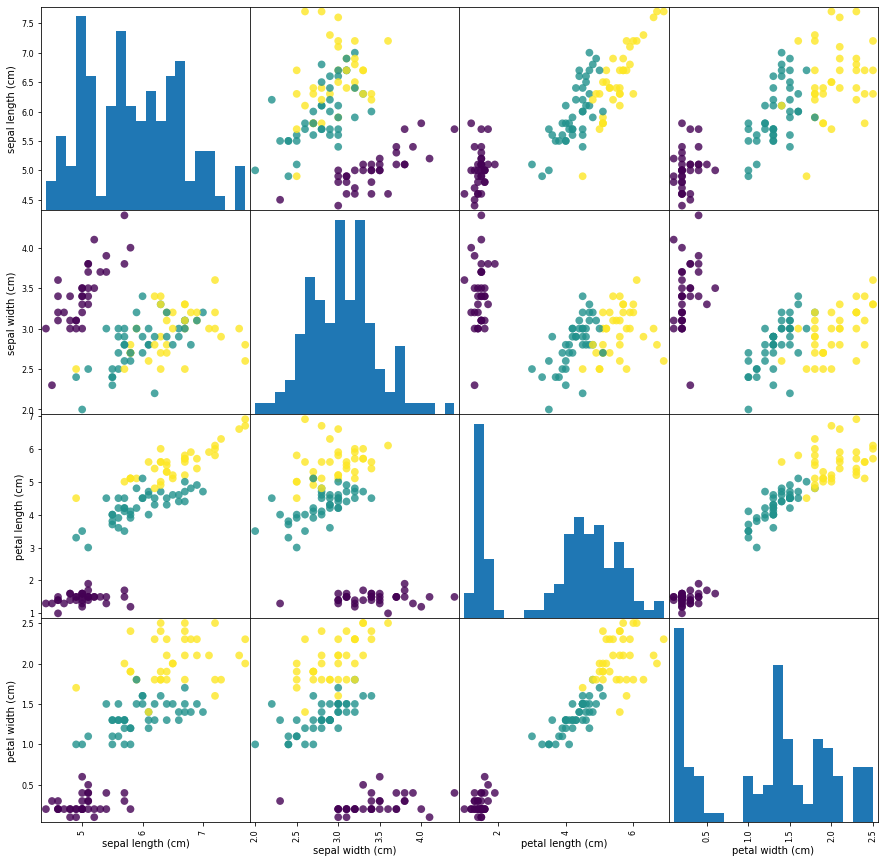

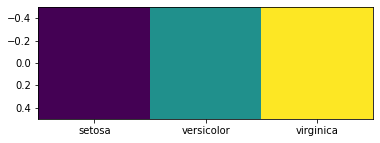

In [30]:
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만든다.
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15),
                           marker='o',hist_kwds={'bins':20},
                           s=60,alpha=.8)
plt.show()
plt.imshow([np.unique(y_train)])
_ = plt.xticks(ticks=np.unique(y_train),labels=iris_dataset['target_names'])

첫번째 머신러닝 모델 : kNN ( k-최근접 이웃 알고리즘)

In [31]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
# 학습하기
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
# 꽃받침 길이, 폭, 꽃잎 길이, 폭 가상의 새 데이터 생성
X_new = np.array([[4,2.9,1,0.3]])
print("X_new.shape :",X_new.shape)

# X_new 예측하기
prediction = knn.predict(X_new)
print("예측 : ",prediction)
print("예측한 타깃의 이름 : ",iris_dataset['target_names'][prediction])


X_new.shape : (1, 4)
예측 :  [0]
예측한 타깃의 이름 :  ['setosa']


In [49]:
#모델 평가하기
y_pred = knn.predict(X_test)
print("테스트 세트의 예측값 : ",y_pred)

테스트 세트의 예측값 :  [2 0 2 2 1 0 2 2 0 0 2 1 1 2 2 2 0 2 0 1 1 1 2 0 2 0 2 0 2 2 0 2 0 2 1 0 0
 0]


In [50]:
# mean() 함수 사용하여 정확도 확인
np.mean(y_pred == y_test)

0.9736842105263158

In [51]:
# score() 함수 사용하여 정확도 확인
knn.score(X_test,y_test)

0.9736842105263158

knn 요약

In [53]:
X_train,X_test,y_train,y_test = train_test_split(
    iris_dataset['data'],iris_dataset['target'],random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

print("테스트 세트의 정확도 : {:.4f}%".format(knn.score(X_test,y_test)*100))

테스트 세트의 정확도 : 97.3684%
